In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from fbprophet import Prophet

In [2]:
root_dir = '/Users/kessapassa/OneDrive/research_log/20190114/2D/'

In [3]:
dir_list = ['people10000', 'people20000', 'people30000']
seed_list = [str(123 + i) for i in range(3)]
csv_list = ['census', 'mobile']

In [4]:
# 2Dをdatetime型にする
import datetime
def create_datetime(row):
#     base_date = '2018-01-01 00:00:00'
    base_date = '00:00:00'
    hours = int(row['time'] / 3600)
    seconds = int(row['area'])
    
    tdatatime = datetime.datetime.strptime(base_date, '%H:%M:%S')
    tdatatime += datetime.timedelta(hours=hours)
    tdatatime += datetime.timedelta(hours=hours, seconds=seconds)
    
    return tdatatime

In [5]:
# csv_array = {}
# for _dir in dir_list:
#     csv_array[_dir] = {}
#     for _seed in seed_list:
#         csv_array[_dir][_seed] = {}
#         for _csv in csv_list:
#             csv_array[_dir][_seed][_csv] = {}
            
#             df = pd.read_csv(root_dir + _dir + 'seed' + _seed + '_' + _csv + '.csv',
#                                                 encoding='Shift_JISx0213')
#             df = df.T
#             df.loc['ds',:] = df.apply(create_datetime)
#             df = df.T
#             df = df[['ds', 'people']].rename(columns={'ds': 'ds', 'people': 'y'})
#             df.to_csv('/Users/kessapassa/OneDrive/research_log/20190104/datetime/'+_dir + 'seed' + _seed + '_' + _csv + '.csv')

In [6]:
csv_array = {}
for _dir in dir_list:
    csv_array[_dir] = {}
    for _seed in seed_list:
        csv_array[_dir][_seed] = {}
        for _csv in csv_list:
            csv_array[_dir][_seed][_csv] = {}
            
            df = pd.read_csv(root_dir + _dir + 'seed' + _seed + '_' + _csv + '.csv',
                                                encoding='Shift_JISx0213')
            df = df.groupby(['area'])
            for _area, _group in df:
                _area = int(_area)
                _group = _group.T
                _group.loc['ds', :] = _group.apply(create_datetime)
                _group = _group.T.drop(['time', 'area'], axis=1)
                # dsとyを指定してくるので
                _group = _group[['ds', 'people']].rename(columns={'ds': 'ds', 'people': 'y'})
                _group['y'] = _group['y'].apply(lambda x: int(x))
                csv_array[_dir][_seed][_csv][_area] = _group

In [7]:
# csv_array = {}
# for _dir in dir_list:
#     csv_array[_dir] = {}
#     for _seed in seed_list:
#         csv_array[_dir][_seed] = {}
#         for _csv in csv_list:
#             df = pd.read_csv(root_dir + _dir + 'seed' + _seed + '_' + _csv + '.csv',
#                                                 index_col=0,
#                                                 encoding='Shift_JISx0213')
#             csv_array[_dir][_seed][_csv] = df

In [8]:
people = 'people30000'
csv = 'census'
seed = '123'
area = '４０'

INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 3.0.
/Users/kessapassa/anaconda3/lib/python3.6/site-packages/fbprophet/forecaster.py:353: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  np.linspace(0, hist_size - 1, self.n_changepoints + 1)


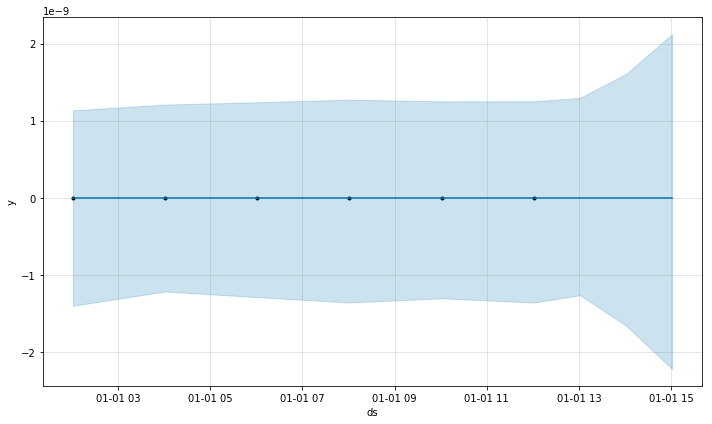

In [9]:
df = csv_array[people][seed][csv][_area].copy()
model = Prophet(changepoint_prior_scale=0.01, yearly_seasonality=False, weekly_seasonality=False, daily_seasonality=False)
model.fit(df)
future = model.make_future_dataframe(periods=3, freq='H')
pred = model.predict(future)
fig = model.plot(pred)

In [10]:
pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1900-01-01 02:01:20,0.0,-1.401685e-09,1.134435e-09,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1900-01-01 04:01:20,0.0,-1.216107e-09,1.208999e-09,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1900-01-01 06:01:20,0.0,-1.289346e-09,1.239148e-09,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1900-01-01 08:01:20,0.0,-1.359033e-09,1.272815e-09,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1900-01-01 10:01:20,0.0,-1.304781e-09,1.251413e-09,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1900-01-01 12:01:20,0.0,-1.359110e-09,1.252308e-09,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1900-01-01 13:01:20,0.0,-1.264935e-09,1.295857e-09,-7.989225e-11,6.357724e-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1900-01-01 14:01:20,0.0,-1.658456e-09,1.606749e-09,-8.177864e-10,6.852040e-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1900-01-01 15:01:20,0.0,-2.222533e-09,2.122796e-09,-2.001614e-09,1.972895e-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0


0
1.0
y =  0.0x +  0.0


1
1.0
y =  0.0x +  0.0


2
1.0
y =  0.0x +  0.0


3
1.0
y =  0.0x +  0.0


4
1.0
y =  0.0x +  0.0


5
1.0
y =  0.0x +  0.0


6
1.0
y =  0.0x +  0.0


7
1.0
y =  0.0x +  0.0


8
1.0
y =  0.0x +  0.0


9
1.0
y =  0.0x +  0.0


10
0.014285714283375661
y = -7.937e-15x + -1.753e+04


11
0.05082706766757994
y = -5.159e-14x + -1.139e+05


12
0.16987701040046777
y = -2.659e-13x + -5.873e+05


13
1.0
y =  0.0x +  0.0


14
1.0
y =  0.0x +  0.0


15
1.0
y =  0.0x +  0.0


16
1.0
y =  0.0x +  0.0


17
1.0
y =  0.0x +  0.0


18
0.27950310558644675
y = -5.952e-14x + -1.315e+05


19
0.0164208753761802
y = -6.27e-13x + -1.385e+06


20
0.0032967032975869115
y = -1.587e-14x + -3.506e+04


21
0.0029141370340307615
y = -1.111e-13x + -2.454e+05


22
0.008067226890749013
y = -6.349e-14x + -1.402e+05


23
1.0
y =  0.0x +  0.0


24
1.0
y =  0.0x +  0.0


25
0.49387755102420944
y = -4.365e-14x + -9.642e+04


26
1.0
y =  0.0x +  0.0


27
1.0
y =  0.0x +  0.0


28
0.006968641115530305
y 

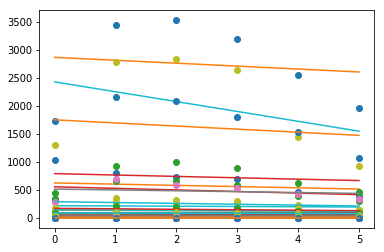

In [11]:
from sklearn.linear_model import LinearRegression as LR
import seaborn as sns

for _area in range(81):
    df = csv_array[people][seed][csv][_area].copy()
    trainX = df['ds'].values.reshape(-1, 1)
    trainY = df['y'].values.reshape(-1, 1)
    model = LR()
    model.fit(trainX, trainY)
    print(_area)
    print(model.score(trainX, trainY))
    print('y = {0: .4}x + {1: .4}'.format(model.coef_[0, 0], model.intercept_[0]))
    print('\n')
    
    Px = np.arange(0, len(trainX), 1)
    plt.plot(Px, trainY, 'o')
    plt.plot(Px, model.predict(trainX))
    

In [12]:
import sympy
from scipy import optimize
def func3(param,x,y):
    residual = y - (param[0]*x**3 + param[1]*x**2 + param[2]*x + param[3])
    return residual


area = 22
df = csv_array[people][seed][csv][area].copy()
trainX = df['ds'].values.reshape(-1, 1)
# df['y'] = df['y'].apply(lambda x: np.float64(x))
trainY = df['y'].values.reshape(-1, 1)
# trainY = np.array([sympy.N(i) for i in trainY])
Px = np.arange(0, len(trainX), 1)
param=np.polyfit(Px, trainY, 3)
residual = trainY - (param[0]*Px**3 + param[1]*Px**2 + param[2]*Px + param[3])
residual
param
# res_leas3 = optimize.leastsq(func3, res3, args=(Px, trainY))

array([[ 0.03703704],
       [-3.74206349],
       [17.37169312],
       [13.81746032]])

In [13]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score

import seaborn as sns
def create_regplot(area, order=3):
    df = csv_array[people][seed][csv][area].copy()
    trainX = df['ds'].values.reshape(-1, 1)
    trainY = df['y'].values.reshape(-1, 1)
    Px = np.arange(0, len(trainX), 1)
    
    ax = sns.regplot(x=Px, y=trainY, order=order, ci=75)
    z = np.polyfit(Px, trainY, 3)
    z = np.squeeze(z)
    p = np.poly1d(z)
    print(p)
    
    return  p

In [14]:
def culculate_3d_regression(area, x):
    p = create_regplot(area)
    p = np.asanyarray(p)
    y = p[0]*x**3 + p[1]*x**2 + p[2]*x + p[3]
    return y

         3         2
0.03704 x - 3.742 x + 17.37 x + 13.82


31.580357142857164

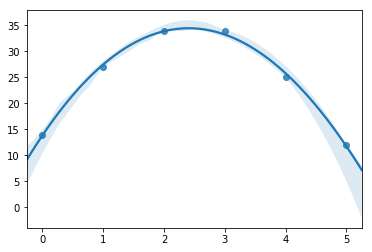

In [15]:
area = 22
x=1.5
culculate_3d_regression(area, x)

In [23]:
dir_list = ['people10000', 'people20000', 'people30000']
seed_list = [str(123 + i) for i in range(3)]
csv_list = ['census', 'mobile']
area_list = [str(i) for i in range(36)]

In [24]:
seed_array = {}
for _dir in dir_list:
    seed_array[_dir] = {}
    for _csv in csv_list:
        seed_array[_dir][_csv] = {}
        for _area in area_list:
            df = pd.read_csv('/Users/kessapassa/OneDrive/research_log/20190104/datetime_per_seed/' + _dir +  '_' + _csv + _area + '.csv',
                                            encoding='Shift_JISx0213')
            seed_array[_dir][_csv][_area] = df

INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 13.0.


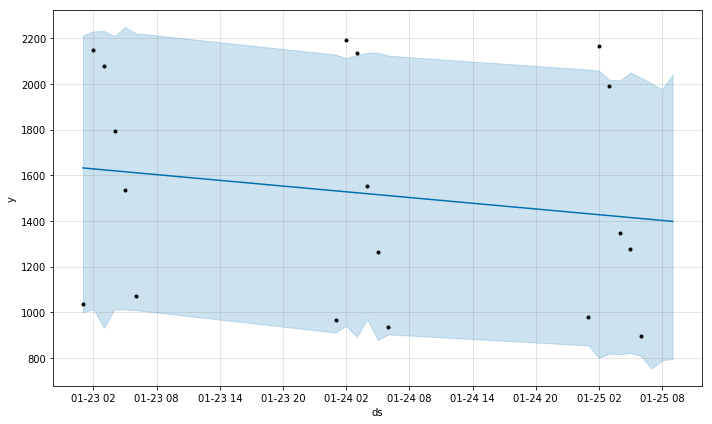

In [26]:
area = '28'
df = seed_array[people][csv][area] 
model = Prophet(changepoint_prior_scale=0.01, yearly_seasonality=False, weekly_seasonality=False, daily_seasonality=False)
model.fit(df)
future = model.make_future_dataframe(periods=3, freq='H')
pred = model.predict(future)
fig = model.plot(pred)